# <필수과제 2>
- 시계열데이터는 준님이 구글드라이브에 업로드 예정.
- 만약 시계열 데이터라면? 추세가 반영될 수 있기 때문에 선형보간이 더 좋은 결과가 나올 수 있다.
- 시계열데이터를 공유할 예정 -> 해당 데이터를 가지고 결측값을 만들고 오늘 배웠던 평균 또는 최빈값등 기초통계량 선형보간 등 interpolation iterative imputer
- 시계열데이터는 어떤 식으로 결측값을 대체했을 때 더 좋은 결과가 나오지 확인하기!
- 다만 시계열데이터를 결측값을 만들기 전에 기존 데이터의 분포와 관계, 컬럼들에 대한 관계들을 확인해 보시고 ( 간단한 시각화로 ) 결측치를 만들어서 결과를 비교해 주세요.

## [필수과제 시계열 데이터 설명]
- seattle-weather.csv ( 구글 업로드 완료 )
- kaggle 출처
- 시애틀 데이터 컬럼은 너무 직관적이라 설명 생략 
- y값 precipitation 
- 사용 컬럼 temp_max, temp_min, wind 
- wather 컬럼은 인코딩이 필요해서 아시는 분은 사용하시고 사용 안 하셔도 됩니다.

#### 꼭 참고할 게 시계열 데이터이므로 train_test_split 사용하면 안 됩니다! 
따라서 인덱스 기준으로 데이터 잘라서 진행해 주시길 바랍니다. 
전체 데이터 중 7:3 비중으로 자르기 

그리고 결측값은 모든 컬럼에 최소 50개 이상은 만들어 주세요!
( 만약 여유로우신 분은 컬럼 별로 다르게 결측치를 만들어서 100, 500, 1000개 로 만들어 보시고 진행하셔도 좋습니다 ! )

과제 잘 부탁드립니다!!

# 1. EDA

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
seat = pd.read_csv('seattle-weather.csv')
seat.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [2]:
seat=seat.drop(columns='weather')
seat.head()

,date,precipitation,temp_max,temp_min,wind
0,2012-01-01,0.0,12.8,5.0,4.7
1,2012-01-02,10.9,10.6,2.8,4.5
2,2012-01-03,0.8,11.7,7.2,2.3
3,2012-01-04,20.3,12.2,5.6,4.7
4,2012-01-05,1.3,8.9,2.8,6.1


In [3]:
seat

,date,precipitation,temp_max,temp_min,wind
0,2012-01-01,0.0,12.8,5.0,4.7
1,2012-01-02,10.9,10.6,2.8,4.5
2,2012-01-03,0.8,11.7,7.2,2.3
3,2012-01-04,20.3,12.2,5.6,4.7
4,2012-01-05,1.3,8.9,2.8,6.1
...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9
1457,2015-12-28,1.5,5.0,1.7,1.3
1458,2015-12-29,0.0,7.2,0.6,2.6
1459,2015-12-30,0.0,5.6,-1.0,3.4


In [4]:
seat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [5]:
seat.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [6]:
seat.cov()

,precipitation,temp_max,temp_min,wind
precipitation,44.624996,-11.221541,-2.438887,3.150857
temp_max,-11.221541,54.018944,32.328483,-1.742150
temp_min,-2.438887,32.328483,25.230571,-0.535781
wind,3.150857,-1.742150,-0.535781,2.067341


In [7]:
seat.corr(method='pearson')

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


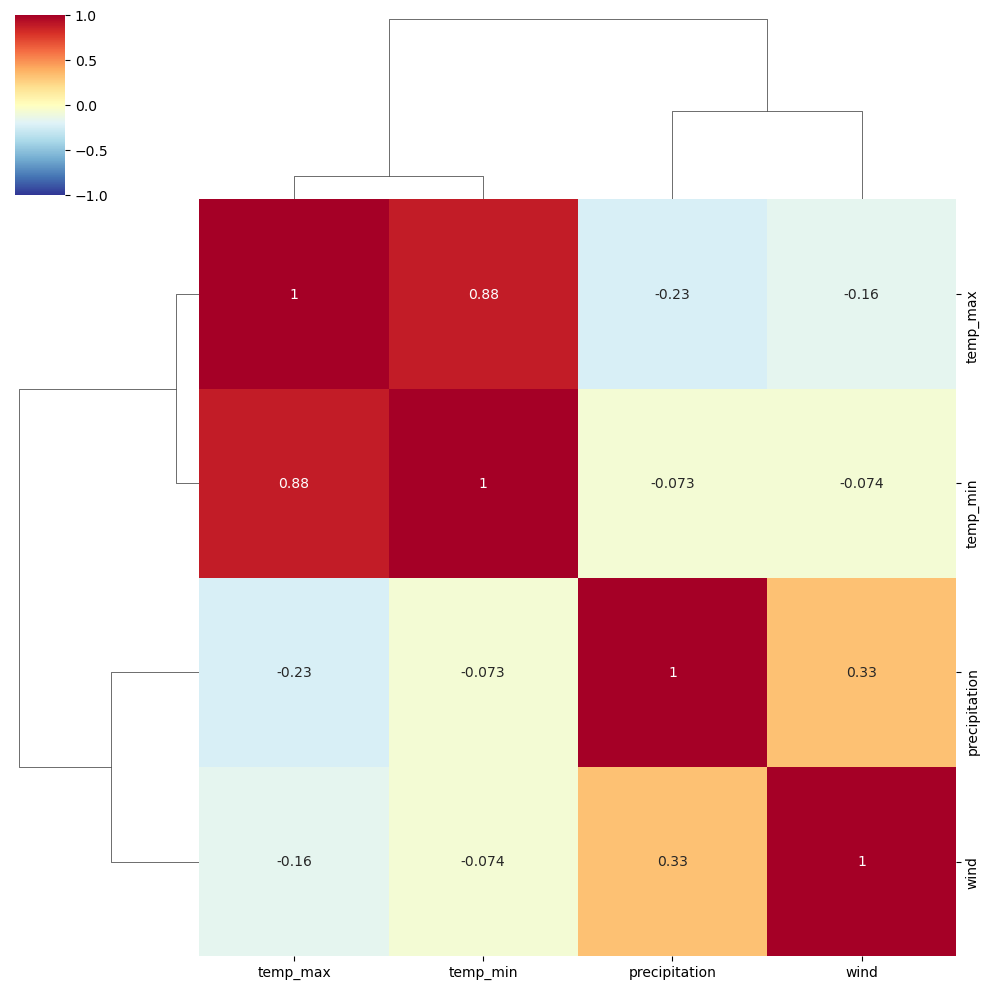

In [8]:
sns.clustermap(seat.corr(), 
               annot = True,      
               cmap = 'RdYlBu_r',  
               vmin = -1, vmax = 1,
              )
plt.show()

In [9]:
seat.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
dtype: int64

# 2. 결측치 만들기

In [10]:
seat_x= seat[['temp_max','temp_min','wind']]
seat_x

,temp_max,temp_min,wind
0,12.8,5.0,4.7
1,10.6,2.8,4.5
2,11.7,7.2,2.3
3,12.2,5.6,4.7
4,8.9,2.8,6.1
...,...,...,...
1456,4.4,1.7,2.9
1457,5.0,1.7,1.3
1458,7.2,0.6,2.6
1459,5.6,-1.0,3.4


In [11]:
msv=np.random.randint(0,389, size=200)
msv

array([210, 184,  48, 222, 288, 295,  46, 120, 104, 262, 350, 249,  99,
       213, 154, 155, 144, 309, 319, 262, 373, 150,  78, 307, 231, 253,
       108, 382, 110, 308, 365, 312, 315,  42,   1, 369, 263, 128, 121,
        77, 131,  38, 180,  98, 386, 191, 260, 306, 244,  57, 148, 271,
       166, 186, 201, 347, 178,  18, 133, 111,  93, 147, 388, 261, 384,
       318,  97, 305, 280, 344, 195,  57,  79, 340, 118, 263,  26, 233,
       323,  35,  13, 134, 376, 122, 138, 331, 388, 364,  66, 319,  45,
       210, 378, 250,  62, 312, 202, 292, 208, 227, 351, 238, 230, 183,
       117, 186,  81, 210, 166,  61, 216, 199, 219, 241, 323,  21, 157,
       175, 310, 104,  78, 137, 316,  28, 147,  68, 351,  80, 298, 311,
       373, 303, 156, 151, 229, 308, 385, 246, 131, 276,  72, 332, 125,
       156, 279, 181,  28, 252, 291,   8, 209, 201,   2, 160,  75, 252,
       223, 231,  70,  82,  83, 211,   5, 290, 214, 224, 311, 353, 289,
       257, 318, 256, 363, 334, 269,  49,  82, 169, 356, 126, 29

In [12]:
seat_x.iloc[msv] = np.nan

C:\Users\qorud\AppData\Local\Temp\ipykernel_10424\2090769268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seat_x.iloc[msv] = np.nan


In [13]:
seat_x.isna().sum()

temp_max    165
temp_min    165
wind        165
dtype: int64

<AxesSubplot:>

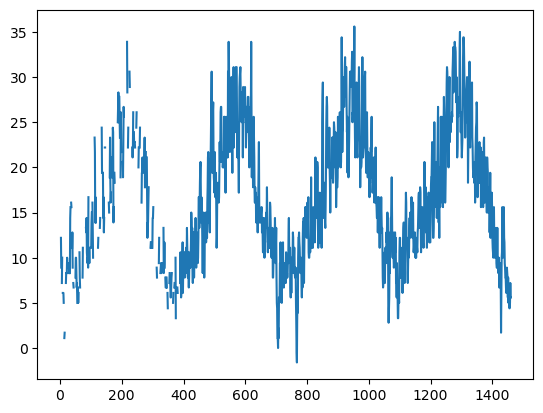

In [14]:
seat_sp =pd.concat([seat_x ,seat['precipitation']],axis=1)
seat_sp1 =pd.concat([seat_x ,seat['precipitation']],axis=1)
seat_sp2 =pd.concat([seat_x ,seat['precipitation']],axis=1)
seat_sp3 =pd.concat([seat_x ,seat['precipitation']],axis=1)
seat_sp4 =pd.concat([seat_x ,seat['precipitation']],axis=1)

seat_sp.temp_max.plot()

# 3. 평균대체법

In [15]:
seat_sp1['temp_max'] = seat_sp1['temp_max'].fillna(seat_x.temp_max.mean())
seat_sp1['temp_min'] = seat_sp1['temp_min'].fillna(seat_x.temp_min.mean())
seat_sp1['wind'] = seat_sp1['wind'].fillna(seat_x.wind.mean())
seat_sp1.isna().sum()

temp_max         0
temp_min         0
wind             0
precipitation    0
dtype: int64

In [16]:
import statsmodels.api as sm #회귀 분석 모듈
import matplotlib.pyplot as plt # 시각화 모듈
y1=seat_sp1.precipitation.iloc[0:700]
x1=seat_sp1.iloc[0:700]
x1=x1.drop(columns='precipitation')
fit_train1 = sm.OLS(y1, x1) # 회귀분석 진행하기 (다중회귀)
fit_train1 = fit_train1.fit() # 회귀분석 Fit 모델
y1_test=seat_sp1.precipitation.iloc[701:1460]
x1_test=seat_sp1.iloc[701:1460]
x1_test=x1_test.drop(columns='precipitation')


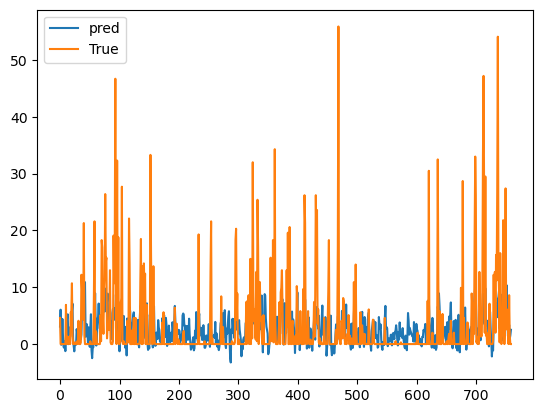

In [17]:
plt.plot(np.array(fit_train1.predict(x1_test)),label='pred')
plt.plot(np.array(y1_test), label='True')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_true = y1_test, y_pred = fit_train1.predict(x1_test))
print(mse1)

41.30197793035452


# 4. simpleimputer_median

In [19]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
seat_sp2 =imp_mean.fit_transform(seat_sp2)
seat_sp2

array([[12.8,  5. ,  4.7,  0. ],
       [15.6,  8.9,  3. , 10.9],
       [15.6,  8.9,  3. ,  0.8],
       ...,
       [ 7.2,  0.6,  2.6,  0. ],
       [ 5.6, -1. ,  3.4,  0. ],
       [ 5.6, -2.1,  3.5,  0. ]])

In [20]:
seat_sp2= pd.DataFrame(seat_sp2)
seat_sp2.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [21]:
seat_sp2.columns = ['temp_max','temp_min','wind','precipitation']
seat_sp2

,temp_max,temp_min,wind,precipitation
0,12.8,5.0,4.7,0.0
1,15.6,8.9,3.0,10.9
2,15.6,8.9,3.0,0.8
3,12.2,5.6,4.7,20.3
4,8.9,2.8,6.1,1.3
...,...,...,...,...
1456,4.4,1.7,2.9,8.6
1457,5.0,1.7,1.3,1.5
1458,7.2,0.6,2.6,0.0
1459,5.6,-1.0,3.4,0.0


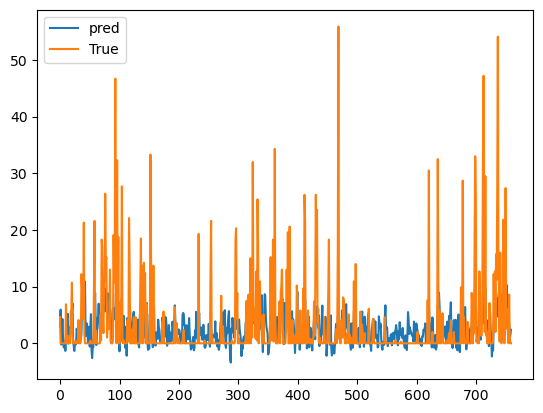

In [22]:
y2=seat_sp2.precipitation.iloc[0:700]
x2=seat_sp2.iloc[0:700]
x2=x2.drop(columns='precipitation')

fit_train2 = sm.OLS(y2, x2) # 회귀분석 진행하기 (다중회귀)
fit_train2 = fit_train2.fit() # 회귀분석 Fit 모델
y2_test=seat_sp2.precipitation.iloc[701:1460]
x2_test=seat_sp2.iloc[701:1460]
x2_test=x2_test.drop(columns='precipitation')
plt.plot(np.array(fit_train2.predict(x2_test)),label='pred')
plt.plot(np.array(y2_test), label='True')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_true = y2_test, y_pred = fit_train2.predict(x2_test))
print(mse2)

41.31790470308283


# 5. SimpleImputer- Frequency

In [24]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
seat_sp4 = imp_mean.fit_transform(seat_sp4)
seat_sp4

C:\Users\qorud\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


array([[12.8,  5. ,  4.7,  0. ],
       [11.1, 10. ,  2.6, 10.9],
       [11.1, 10. ,  2.6,  0.8],
       ...,
       [ 7.2,  0.6,  2.6,  0. ],
       [ 5.6, -1. ,  3.4,  0. ],
       [ 5.6, -2.1,  3.5,  0. ]])

In [25]:
seat_sp4= pd.DataFrame(seat_sp4)
seat_sp4.columns = ['temp_max','temp_min','wind','precipitation']
seat_sp4
seat_sp4.isna().sum()

temp_max         0
temp_min         0
wind             0
precipitation    0
dtype: int64

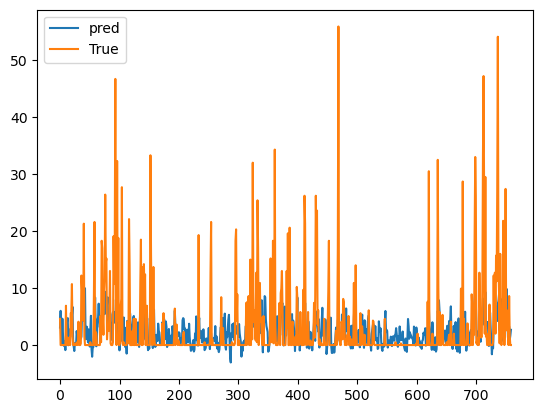

In [26]:
y4=seat_sp4.precipitation.iloc[0:700]
x4=seat_sp4.iloc[0:700]
x4=x4.drop(columns='precipitation')

fit_train4 = sm.OLS(y4, x4) # 회귀분석 진행하기 (다중회귀)
fit_train4 = fit_train4.fit() # 회귀분석 Fit 모델
y4_test=seat_sp4.precipitation.iloc[701:1460]
x4_test=seat_sp4.iloc[701:1460]
x4_test=x4_test.drop(columns='precipitation')
plt.plot(np.array(fit_train4.predict(x4_test)),label='pred')
plt.plot(np.array(y4_test), label='True')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
mse4 = mean_squared_error(y_true = y4_test, y_pred = fit_train4.predict(x4_test))
print(mse4)

41.93083804944319


# 6. iterative imputer

In [28]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer # 임퓨터 불러오기
imputer = IterativeImputer(imputation_order = 'descending',
                          max_iter=10, random_state=111,
                          n_nearest_features=4)

seat_sp3 =imputer.fit_transform(seat_sp3)
seat_sp3

C:\Users\qorud\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


array([[12.8       ,  5.        ,  4.7       ,  0.        ],
       [14.80073843,  8.12438177,  3.79669943, 10.9       ],
       [17.1475697 ,  8.48638449,  3.08027765,  0.8       ],
       ...,
       [ 7.2       ,  0.6       ,  2.6       ,  0.        ],
       [ 5.6       , -1.        ,  3.4       ,  0.        ],
       [ 5.6       , -2.1       ,  3.5       ,  0.        ]])

In [29]:
seat_sp3= pd.DataFrame(seat_sp3)
seat_sp3.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [30]:
seat_sp3.columns = ['temp_max','temp_min','wind','precipitation']
seat_sp3

,temp_max,temp_min,wind,precipitation
0,12.800000,5.000000,4.700000,0.0
1,14.800738,8.124382,3.796699,10.9
2,17.147570,8.486384,3.080278,0.8
3,12.200000,5.600000,4.700000,20.3
4,8.900000,2.800000,6.100000,1.3
...,...,...,...,...
1456,4.400000,1.700000,2.900000,8.6
1457,5.000000,1.700000,1.300000,1.5
1458,7.200000,0.600000,2.600000,0.0
1459,5.600000,-1.000000,3.400000,0.0


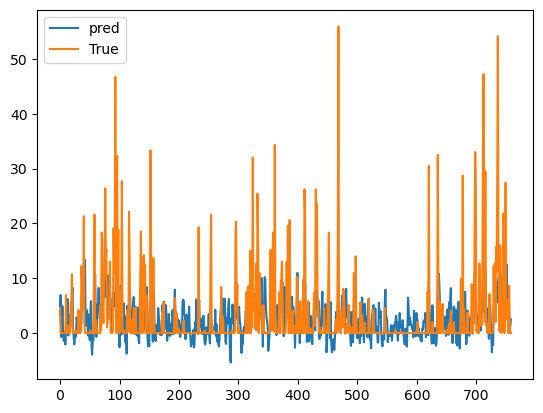

In [31]:
y3=seat_sp3.precipitation.iloc[0:700]
x3=seat_sp3.iloc[0:700]
x3=x3.drop(columns='precipitation')

fit_train3 = sm.OLS(y3, x3) # 회귀분석 진행하기 (다중회귀)
fit_train3 = fit_train3.fit() # 회귀분석 Fit 모델
y3_test=seat_sp3.precipitation.iloc[701:1460]
x3_test=seat_sp3.iloc[701:1460]
x3_test=x3_test.drop(columns='precipitation')
plt.plot(np.array(fit_train3.predict(x3_test)),label='pred')
plt.plot(np.array(y3_test), label='True')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(y_true = y3_test, y_pred = fit_train3.predict(x3_test))
print(mse3)

40.58567757738593


In [34]:
print( 'mean:', mse1)
print( 'median:', mse2)
print( 'frequence:', mse4)
print( 'iterative imputer:', mse3)

mean: 41.30197793035452
median: 41.31790470308283
frequence: 41.93083804944319
iterative imputer: 40.58567757738593
